In [1]:
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset = cifar10.load_data()

170508288/170498071 [==============================] - 15s 0us/step


In [3]:
(x_train, _ ), (x_test, _ ) = dataset
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape(len(x_train),x_train.shape[1],x_train.shape[2],3)
x_test = x_test.reshape(len(x_test), x_test.shape[1],x_test.shape[2],3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3,  padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))      # 16x16x32
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))      # 16x16x32
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))      # 16x16x32
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))      # 16x16x32
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))      # 16x16x32
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)        

In [11]:
history = model.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
196/196 [==============================] - 5s 20ms/step - loss: 0.0260 - accuracy: 0.5482 - val_loss: 0.0165 - val_accuracy: 0.6208
Epoch 2/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0152 - accuracy: 0.6509 - val_loss: 0.0138 - val_accuracy: 0.6883
Epoch 3/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0135 - accuracy: 0.7058 - val_loss: 0.0128 - val_accuracy: 0.7128
Epoch 4/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0126 - accuracy: 0.7206 - val_loss: 0.0121 - val_accuracy: 0.7275
Epoch 5/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0120 - accuracy: 0.7278 - val_loss: 0.0117 - val_accuracy: 0.7230
Epoch 6/10
196/196 [==============================] - 3s 16ms/step - loss: 0.0117 - accuracy: 0.7341 - val_loss: 0.0118 - val_accuracy: 0.7390
Epoch 7/10
196/196 [==============================] - 3s 16ms/step - loss: 0.0114 - accuracy: 0.7388 - val_loss: 0.0113 - val_accuracy: 0.7407

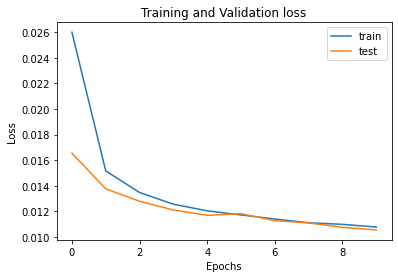

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
predicted = model.predict(x_test)

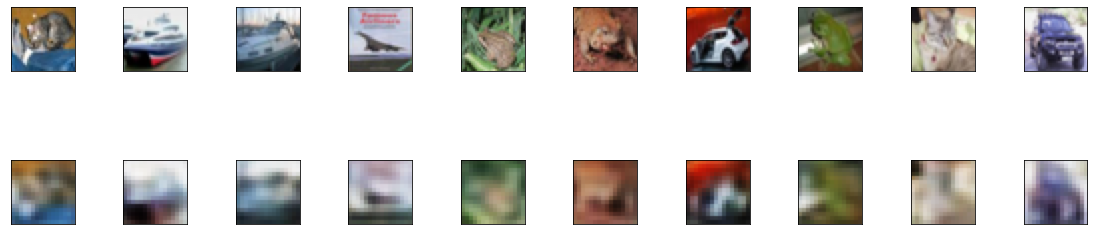

In [14]:
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()